In [1]:
import numpy as np
import pandas as pd

import os
import sys
sys.path.insert(0, '..')
import ccal

%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

==================== Computational Cancer Analysis Library ====================
<11:41:28> Checking library dependencies ...
<11:41:28> Using the following libraries (in addition to the Anaconda libraries):
<11:41:28> 	scipy (v0.18.0)
<11:41:28> 	statsmodels (v0.6.1)
<11:41:28> 	scikit-learn (v0.17.1)
<11:41:28> 	seaborn (v0.7.1)
<11:41:28> 	rpy2 (v2.8.2)
<11:41:28> 	pandas (v0.18.1)
<11:41:28> 	matplotlib (v1.5.1)
<11:41:28> 	numpy (v1.11.1)
<11:41:28> Planted a random seed 20121020.


# Define states

In [2]:
h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
ks = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30]
n_clusterings = 10
filepath_prefix = 'output/ccle_hema_k_9_H_{}clustering'.format(n_clusterings)
# labels, memberships, cophenetic_correlation = ccal.analyze.define_states(h, ks, n_clusterings=n_clusterings,
#                                                                              filepath_prefix=filepath_prefix)

# Make Onco-GPS

In [3]:
labels = pd.read_csv(filepath_prefix + '_labels.txt', index_col=0, sep='\t')
memberships = ccal.support.read_gct(filepath_prefix + '_memberships.gct')
annotations = ccal.support.make_random_features(1, memberships.shape[1])

ccal.support.VERBOSE = False

for n_components in [4, 5, 6, 7, 8, 9, 10, 11, 12]:
    #h = ccal.support.make_random_features(n_components, 100)
    h = h.iloc[:n_components, :]
    for n_state in range(1, 21, 5):
        for annotation_type in ['continuous', 'categorical', 'binary']:
            if annotation_type == 'continuous':
                annotations = np.random.random_sample(h.shape[1])
            elif annotation_type == 'categorical':
                annotations = np.random.choice(range(n_state), h.shape[1])
            elif annotation_type == 'binary':
                annotations = np.random.choice(range(2), h.shape[1])
            else:
                raise ValueError('Error in annotation_type.')
            ccal.onco_gps.make_map(h,
                                   np.random.choice(list(range(n_state)), h.shape[1]),
                                   annotations=annotations,
                                   annotation_type=annotation_type)#,
                                   #background_markersize=0, background_mask_markersize=0)

# Project samples

In [17]:
labels = filepath_prefix + '_labels.txt'
state = 12

if os.path.isfile(labels):
    labels = pd.read_csv(labels, index_col=0, sep='\t')
    labels.drop('cophenetic_correlation', axis=1, inplace=True)
    
states = labels.ix[state, :]

<11:43:54> Making Onco-GPS with 9 components, 166 samples, and 12 states: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] ...
<11:43:54> '-0-' normalizing pandas object with axis=1 ...
<11:43:54> '0-1' normalizing pandas object with axis=1 ...
<11:43:55> Converting association to distance (1 - association) ...
<11:43:58> '0-1' normalizing pandas object with axis=0 ...
<11:43:58> Modeled columns by 0.0003977486304175168e^(0.9527092629787737x) + 0.03312059144984009.
<11:43:58> component_pulling_power = 1.953.


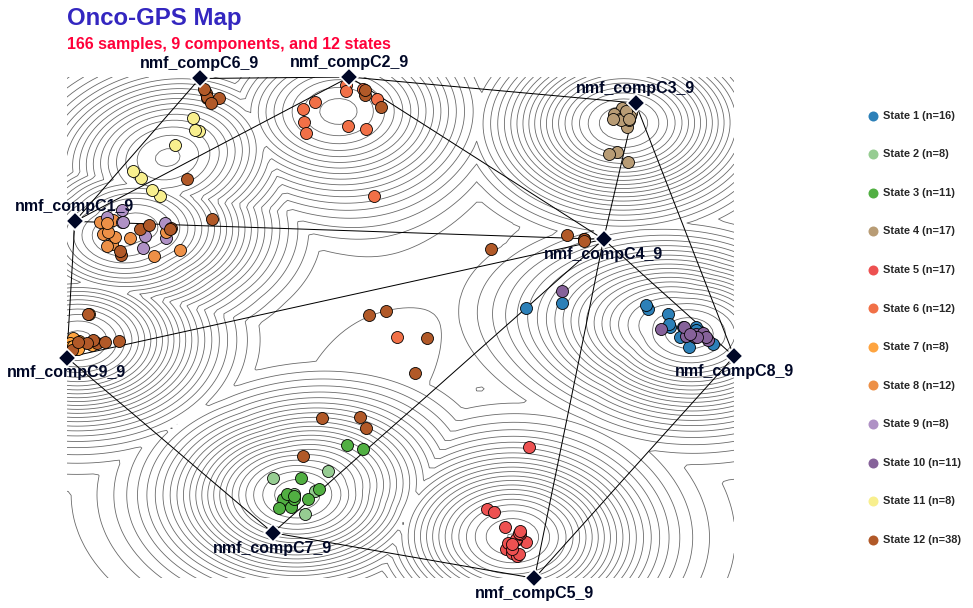

In [19]:
ccal.onco_gps.make_map(h, states, background_markersize=0, background_mask_markersize=0)

<11:44:00> Making Onco-GPS with 9 components, 166 samples, and 12 states: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] ...
<11:44:00> '-0-' normalizing pandas object with axis=1 ...
<11:44:00> '0-1' normalizing pandas object with axis=1 ...
<11:44:01> Converting association to distance (1 - association) ...
<11:44:04> '0-1' normalizing pandas object with axis=0 ...
<11:44:04> Modeled columns by 0.0003977486304175168e^(0.9527092629787737x) + 0.03312059144984009.
<11:44:04> component_pulling_power = 1.953.
<11:44:04> Using samples from testing H matrix ...
<11:44:04> '-0-' normalizing pandas object with axis=1 ...
<11:44:04> '0-1' normalizing pandas object with axis=1 ...


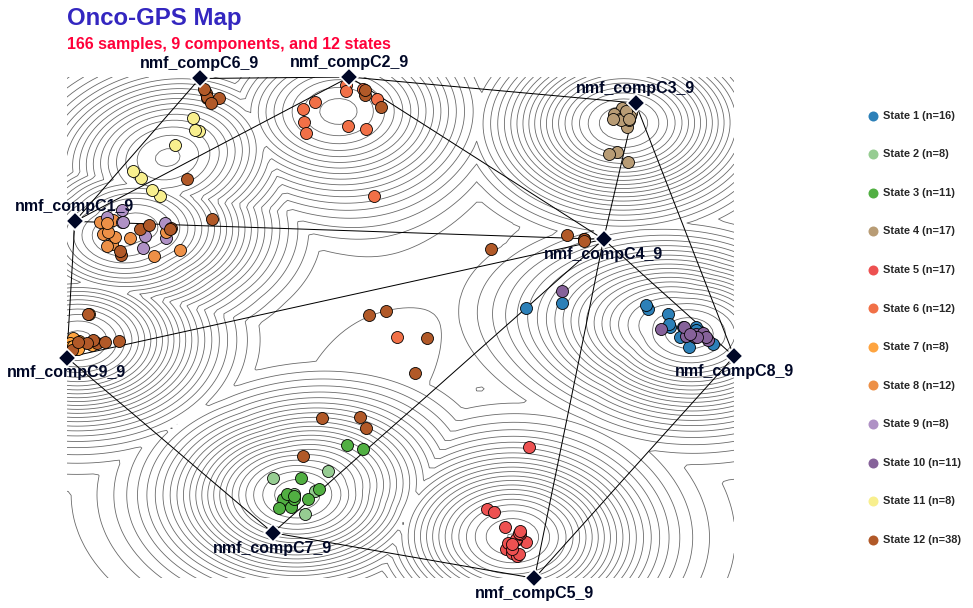

In [20]:
ccal.onco_gps.make_map(h, states, h_test=h, h_test_normalization='b', states_test=states, background_markersize=0, background_mask_markersize=0)

In [21]:
h_test = h.ix[:, :3]
h_test

,A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,A4FUK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
nmf_compC1_9,377.056760,182.661246,112.214419
nmf_compC2_9,1585.512340,1336.702080,632.886073
nmf_compC3_9,59.937349,54.760585,61.557187
nmf_compC4_9,1657.476511,1014.360291,683.287270
nmf_compC5_9,672.892138,433.483719,6485.025436
nmf_compC6_9,0.039155,665.457594,469.615873
nmf_compC7_9,233.140685,602.503641,470.778381
nmf_compC8_9,5031.406828,5497.496701,15.641736
nmf_compC9_9,253.506738,118.441198,1361.869584


In [23]:
states_test = states[: 3]
states_test

A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE     1
A4FUK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE     1
ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE    5
Name: 12, dtype: int64

<13:27:49> Making Onco-GPS with 9 components, 166 samples, and 12 states: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] ...
<13:27:49> '-0-' normalizing pandas object with axis=1 ...
<13:27:49> '0-1' normalizing pandas object with axis=1 ...
<13:27:49> Converting association to distance (1 - association) ...
<13:27:52> '0-1' normalizing pandas object with axis=0 ...
<13:27:52> Modeled columns by 0.0003977486304175168e^(0.9527092629787737x) + 0.03312059144984009.
<13:27:52> component_pulling_power = 1.953.
<13:27:53> Using samples from testing H matrix ...


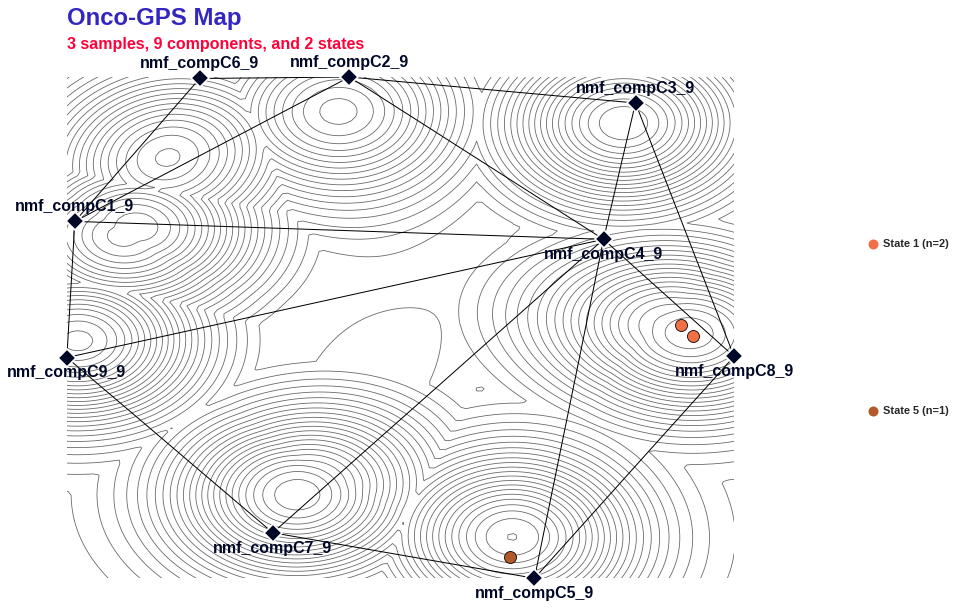

In [25]:
ccal.onco_gps.make_map(h, states, h_test=h_test, states_test=states_test, h_test_normalization='a', background_markersize=0, background_mask_markersize=0)